# House Property Sales Predict(Time Series)

[Data Source](https://www.kaggle.com/deltacrot/property-sales)

In [16]:
import pandas as pd
import altair as alt

In [22]:
def getData():
    filepath = "data/property-sales/ma_lga_12345.csv"
    df = pd.read_csv(filepath)
    return df
df = getData()

df["saledate"] = pd.to_datetime(df["saledate"])
df

,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2
...,...,...,...,...
342,2018-09-30,603281,unit,3
343,2018-12-31,601167,unit,3
344,2019-03-31,605637,unit,3
345,2019-06-30,599339,unit,3


In [28]:
alt.Chart(df).mark_line().encode(
    alt.X("saledate"),
    alt.Y("MA"),
    color="bedrooms:O"
).facet(column="type")

alt.FacetChart(...)

In [55]:
# 
twoBedroomhUnit =  df.query("bedrooms==2 and type == 'unit'").copy()
twoBedroomhUnit.sort_values("saledate", inplace=True)
twoBedroomhUnit.head(10)

,saledate,MA,type,bedrooms
248,2007-06-30,368817,unit,2
249,2007-09-30,368817,unit,2
250,2007-12-31,368817,unit,2
251,2008-03-31,368817,unit,2
252,2008-06-30,373482,unit,2
253,2008-09-30,377481,unit,2
254,2008-12-31,382010,unit,2
255,2009-03-31,380810,unit,2
256,2009-06-30,385791,unit,2
257,2009-09-30,391161,unit,2


In [93]:
ts = pd.Series(twoBedroomhUnit["MA"].values, index=twoBedroomhUnit["saledate"])

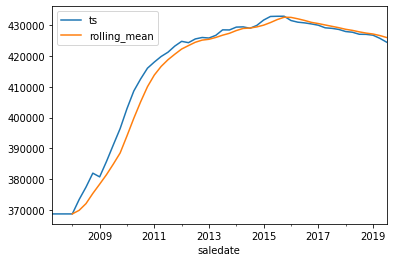

In [94]:
# alt.Chart(twoBedroomhUnit).mark_line().encode(
#     x="saledate:O",
#     y="MA"
# )

# alt.Chart().mark_line().encode(
#     x="saledate:O",
#     y="MA"
# )
rmts = ts.rolling(4,).mean()
rmts.name = "rolling_mean"
ts.name = "ts"
pd.concat([ts,rmts],axis=1).plot()
# pd.concat?

In [92]:
pd.DataFrame.rolling

<function pandas.core.generic.NDFrame._add_series_or_dataframe_operations.<locals>.rolling(self, window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)>